<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/study/sklearn/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **결정 트리**

### (1) 결정트리란
결정 트리는 가장 직관적으로 이해하기 쉬운 알고리즘
- 가능한 한 적은 결정 노드로 분류를 해야 과적합을 막을 수 있음

### (2) 정보의 균일도를 측정하는 대표적인 방법
- 정보 이득 지수 **1 - entropy**
    - 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 반대는 낮다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값이다.
    - 결정 트리는 정보 이득이 높은, 엔트로피가 낮은 속성을 기준으로 분할한다.
- 지니 계수
    - 경제학에서 불평등 지수를 나타낼 때 사용하는 계수로, 0이 가장 평등하고 1로 갈수록 불평등하다. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석한다.
    - 지니 계수가 낮은 속성을 기준으로 분할한다.


### (3) 장단점
- 장점
    - 알고리즘이 쉽고 직관적
    - 시각화 표현 가능
    - 정보의 균일도만 신경쓰면 되므로 특별한 경우 외에는 각 피처의 스케일링과 정규화의 전처리 작업이 필요 없음
- 단점
    - 과적합으로 정확도가 떨어진다
    - 따라서 모든 상황에 만족하는 완벽한 규칙은 없다는 것을 인정하고 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 도움이 됨

### (4) 결정 트리 파라미터
min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수</br>
min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수</br>
max_features : 최적의 분할을 위해 고려할 최대 피처 개수</br>
max_depth : 트리의 최대 깊이 규정</br>
max_leaf_nodes : 말단 노드의 최대 개수


## **시각화 방법**

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

clf = DecisionTreeClassifier(random_state=156)
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [34]:
from sklearn.tree import export_graphviz

export_graphviz(clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

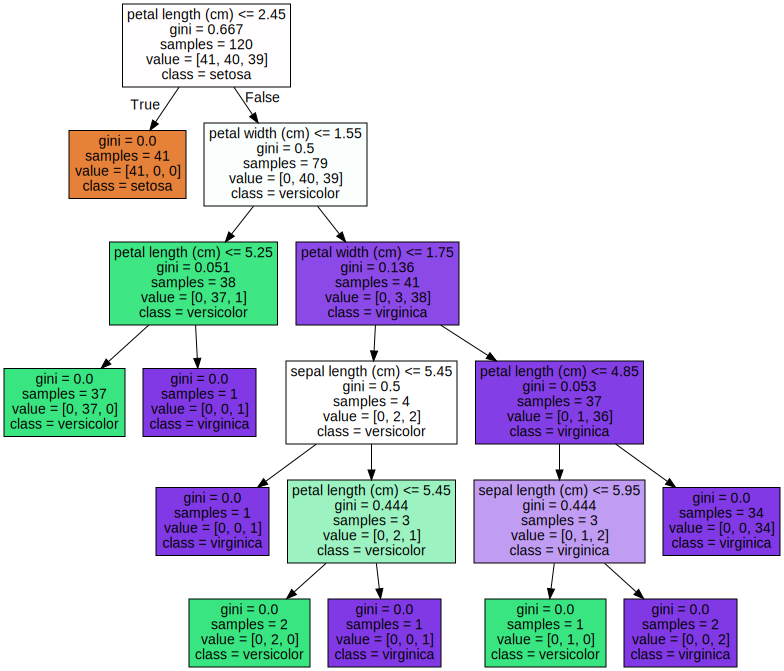

In [35]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

결정 트리는 균일도에 기반에 어떤 속성을 규칙 조건으로 선택하느냐가 중요한 요건이다.
- 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassfiler.feature_importances_ 속성으로 제공한다.

[0.025 0.    0.555 0.42 ]


<Axes: >

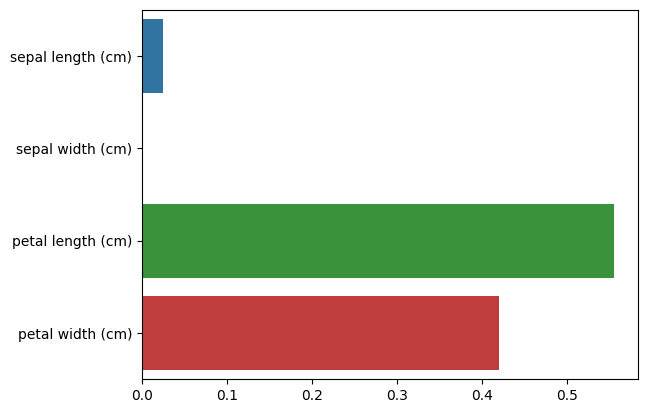

In [36]:
import seaborn as sns
import numpy as np

print(np.round(clf.feature_importances_, 3))

sns.barplot(x=clf.feature_importances_, y=iris_data.feature_names)

## **결정 트리 Overfitting**

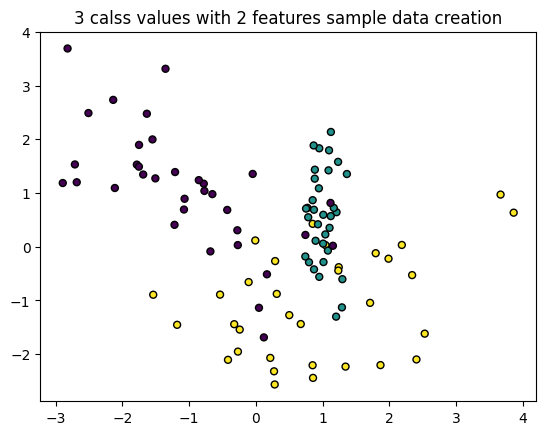

In [37]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 calss values with 2 features sample data creation")

# 랜덤 n-클래스 분류 문제 데이터를 생성한다.
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [38]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

(100, 2) (100,)


<ipython-input-38-55fb20ab9164>:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


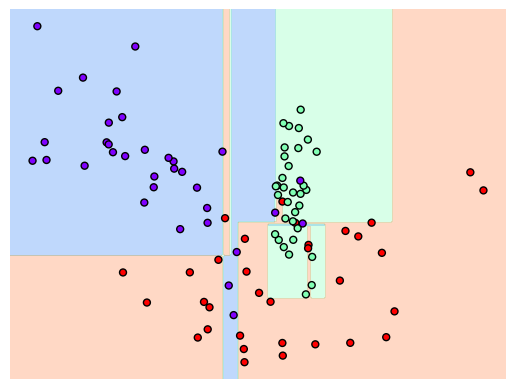

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X, y)
visualize_boundary(clf, X, y)

print(X.shape, y.shape)

<ipython-input-38-55fb20ab9164>:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


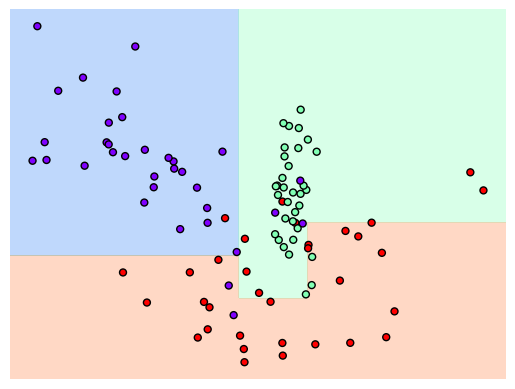

In [40]:
clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X, y)
visualize_boundary(clf, X, y)

## **실습**

[data link](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)

In [103]:
import pandas as pd

feature_name_df = pd.read_csv('features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [104]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df[feature_dup_df['column_index'] > 1].head()

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


**중복되는 피처들을 확인하고 _1, _2를 붙여 구분**

In [107]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()

    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

**데이터셋 완성시키기**

In [120]:
import pandas as pd

def get_human_dataset():
    feature_name_df = pd.read_csv('features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    X_train = pd.read_csv('X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('X_test.txt', sep='\s+', names=feature_name)
    y_train = pd.read_csv('y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('y_test.txt', sep='\s+', header=None, names=['action'])

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [128]:
print(X_train.info(), '\n\n', y_train['action'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None 

 6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.8564642008822532


In [130]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [136]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             scoring='accuracy', verbose=1)

In [137]:
grid_cv.best_params_

{'max_depth': 8}

In [140]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.845758
1,8,0.855966
2,10,0.844135
3,12,0.846040
4,16,0.844679
5,20,0.844951
6,24,0.847263


In [141]:
params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
grid_cv.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


{'max_depth': 10, 'min_samples_split': 24}

In [143]:
best_clf = grid_cv.best_estimator_
pred1 = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(accuracy)

0.8622327790973872


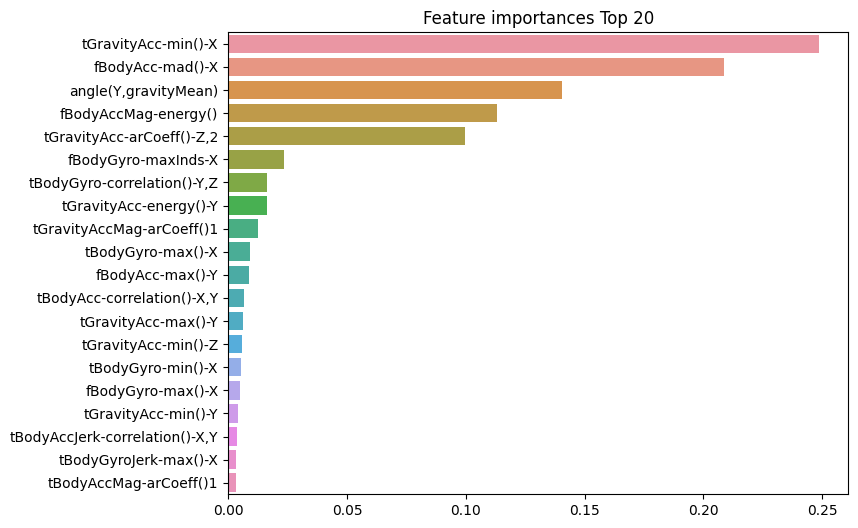

In [146]:
import seaborn as sns

clf_importances_values = best_clf.feature_importances_
clf_importances = pd.Series(clf_importances_values, index=X_train.columns)
clf_top20 = clf_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=clf_top20, y=clf_top20.index)
plt.show()